In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
ruta_json = '//content/drive/MyDrive/Colab Notebooks/emocion.json'
df = pd.read_json(ruta_json)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                 Training_10118481.jpg  Training_10120469.jpg  \
t_id             Training_10118481.jpg  Training_10120469.jpg   
emocion                          angry                  angry   
tiempo_recogida                    291                    425   

                 Training_10131352.jpg  Training_10161559.jpg  \
t_id             Training_10131352.jpg  Training_10161559.jpg   
emocion                          angry                  angry   
tiempo_recogida                    499                    715   

                 Training_1021836.jpg  Training_10269675.jpg  \
t_id             Training_1021836.jpg  Training_10269675.jpg   
emocion                         angry                  angry   
tiempo_recogida                   301                    415   

                 Training_10278738.jpg  Training_10290703.jpg  \
t_id             Training_1

In [ ]:
# Transponer para que columnas sean filas
df_transformado = df.T

# Renombrar columnas (opcional, para claridad)
df_transformado.columns = ['t_id', 'emocion', 'tiempo_recogida']

# Mostrar el resultado
print(df_transformado)

                                            t_id   emocion tiempo_recogida
Training_10118481.jpg      Training_10118481.jpg     angry             291
Training_10120469.jpg      Training_10120469.jpg     angry             425
Training_10131352.jpg      Training_10131352.jpg     angry             499
Training_10161559.jpg      Training_10161559.jpg     angry             715
Training_1021836.jpg        Training_1021836.jpg     angry             301
...                                          ...       ...             ...
PublicTest_98089595.jpg  PublicTest_98089595.jpg  surprise             469
PublicTest_98567249.jpg  PublicTest_98567249.jpg  surprise             299
PublicTest_98972870.jpg  PublicTest_98972870.jpg  surprise             255
PublicTest_99242645.jpg  PublicTest_99242645.jpg  surprise             573
PublicTest_99446963.jpg  PublicTest_99446963.jpg  surprise             466

[35885 rows x 3 columns]


Siguiendo la misma metodología que usó Ana ella usó df.T y explode para convertir columnas en filas, y json_normalize para separar campos.

**Transformar el DataFrame**

**Objetivo**: Convertir las 35,885 columnas en filas, con columnas separadas para t_id, emocion, y tiempo_recogida.  

**Acción**: Transponer el DataFrame con df.T para que cada fotografía sea una fila, y renombrar las columnas.

---

**Por qué este paso?**


**Alineación con la metodología**: Ana transformó el DataFrame inicial para tener filas individuales antes de limpiar. Aquí, df.T logra lo mismo, ya que el JSON cargado puso los datos como columnas.  

**Facilita la limpieza**: Con cada fila representando una fotografía, se puede aplicar filtros (ej. nulos en emocion) y analizar estadísticas como value_counts() para emocion.  

**Coherencia**: Prepara el DataFrame para los pasos siguientes (filtros, nulos, duplicados), igual que con duracion.



In [ ]:
# Exploración

print("Frecuencia de emociones:")
print(df_transformado["emocion"].value_counts())

print("\nEstadísticas de tiempo_recogida:")
print(df_transformado["tiempo_recogida"].describe())

# Diccionario de traducción
traduccion_emociones = {
    'happy': 'feliz',
    'neutral': 'neutral',
    'sad': 'triste',
    'fear': 'miedo',
    'angry': 'enojado',
    'surprise': 'sorpresa',
    'disgust': 'asco'
}
# Cambio de idioma de las emociones
df_transformado['emocion'] = df_transformado['emocion'].replace(traduccion_emociones)

Frecuencia de emociones:
emocion
happy       8901
neutral     6138
sad         6019
fear        5075
angry       4905
surprise    3953
disgust      543
Name: count, dtype: int64

Estadísticas de tiempo_recogida:
count     35885
unique      718
top         150
freq         68
Name: tiempo_recogida, dtype: int64


**Exploración inicial**

**Objetivo**: Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).  

**Acción**:  
Usar value_counts() para emocion (frecuencia de cada emoción).  

Usar describe() para tiempo_recogida (estadísticas numéricas).

crear un diccionario y traducir el nombre de las emociones a español

---

count: 35,885 valores no nulos.  

unique: 718 valores distintos.  

top: 150 (el valor más frecuente).  

freq: 68 (el valor 150 aparece 68 veces).  

---

**Análisis**:

**Emociones**:  
7 emociones únicas, con "feliz" como la más frecuente (8,901) y "asco" la menos (543).  

No hay valores nulos (suma = 35,885), pero podrían haber inconsistencias (ej. espacios, mayúsculas).

**Tiempo_recogida**:  

tiempo_recogida: Representa el momento en que se toma cada fotografía, medido en horas desde las 07:00 del 1 de septiembre de 2022.  

**rango posible**:  
Inicio: 07:00 del 1 de septiembre = hora 0.  

Fin: 06:59 del 1 de octubre = hora 743 (31 días x 24 horas = 744, menos 1 hora porque empieza en 07:00).  

**Total de horas posibles**: 744 valores (0 a 743).

**Resultado tras limpieza**:  
unique: 718 (de las estadísticas de df_transformado["tiempo_recogida"].describe()).  

---

**Filas totales**: 35,534 (fotografías).

35,885 valores, todos no nulos.  

718 valores únicos en un rango posible de 0 a 743 (31 días x 24 horas - 1, desde 07:00 del 1 de septiembre de 2022).  

El valor más común (150) aparece 68 veces, pero falta información sobre mínimos o máximos para detectar errores.

---

**Por qué es importante**:

Cobertura del período del mes:  
El proyecto se basa en datos de septiembre de 2022 (31 días). Tener 718 valores únicos de 744 posibles indica que las fotografías se tomaron en el 96.5% de las horas disponibles (718 ÷ 744 ≈ 0.965).  

**Importancia**: Esto sugiere una alta cobertura temporal, lo que es clave para analizar patrones de experiencia del usuario (ej. emociones preponderantes por hora o día) y calcular KPIs como "días con más visitas" u "horas pico en atracciones". Si faltaran muchas horas, los análisis podrían estar sesgados o incompletos.

**Fotografías**:  
Con 35,534 fotografías y 718 horas únicas, cada hora tiene en promedio 49.5 fotografías (35,534 ÷ 718 = 49.5).  

**Importancia**: Esto refleja la actividad en el parque. Un número alto de fotos por hora (como las 68 en la hora más frecuente, 150) puede indicar momentos de alta afluencia, útiles para identificar tiempos de espera máximos o patrones de uso de atracciones. Si hubiera menos valores únicos (ej. solo 100 horas), las fotos estarían concentradas en menos momentos, limitando la representatividad.

**Validación de datos temporales**:  
El rango de 0 a 743 define el marco temporal válido para septiembre. Que haya 718 valores únicos dentro de este rango (y no más) sugiere que, tras la limpieza, los datos respetan el período del proyecto.  

**Importancia**: Esto asegura que no hay errores temporales fuera de septiembre (ej. valores > 743 o negativos), alineándose con la regla implícita de que los datos deben ser del mes especificado. Es un control de calidad para la tarea de "Identificación de errores e incidencias".

---

**Horas no representadas**:  
Faltan 26 horas (744 - 718 = 26) del rango posible.  

**Importancia**: Estas horas "vacías" podrían ser momentos sin visitantes o sin fotografías (ej. noches, cierres del parque)





In [ ]:
# 1. Filtrar tiempo_recogida (0 a 743 horas en septiembre 2022)
df_transformado = df_transformado[(df_transformado["tiempo_recogida"] >= 0) & (df_transformado["tiempo_recogida"] <= 743)]
df_transformado = df_transformado.dropna(subset=['emocion', 'tiempo_recogida'])
print("Frecuencia de emociones tras limpieza:")
print(df_transformado["emocion"].value_counts())

print("\nEstadísticas de tiempo_recogida tras limpieza:")
print(df_transformado["tiempo_recogida"].describe())

df_transformado['tiempo_recogida'] = df_transformado['tiempo_recogida'].astype(int)
print("\nCon include='all' (debería mostrar min, max, etc.):")
print(df_transformado["tiempo_recogida"].describe(include='all'))
#.describe(include='all') debería mostrar estadísticas completas para una serie numérica como tiempo_recogida, incluyendo: count, mean, std, min, 25%, 50%, 75%, max, unique, top, freq.

Frecuencia de emociones tras limpieza:
emocion
feliz       8901
neutral     6138
triste      6019
miedo       5075
enojado     4905
sorpresa    3953
asco         543
Name: count, dtype: int64

Estadísticas de tiempo_recogida tras limpieza:
count     35534
unique      718
top         150
freq         68
Name: tiempo_recogida, dtype: int64

Con include='all' (debería mostrar min, max, etc.):
count    35534.000000
mean       359.514409
std        207.300483
min          2.000000
25%        180.250000
50%        359.000000
75%        538.000000
max        719.000000
Name: tiempo_recogida, dtype: float64


**Total**: 35,534 (suma de frecuencias).  


---


**Emociones**: "happy", "neutral", "sad", "fear", "angry", "surprise", "disgust" (sin cambios en categorías).


---

**Estadísticas de tiempo_recogida tras limpieza** (df_transformado["tiempo_recogida"].describe()):

count: 35,534 valores no nulos.  

unique: 718 valores distintos.  

top: 150 (valor más frecuente).  

freq: 68 (frecuencia del valor 150).  



---

**Análisis**:
Comparación con antes:  
Antes: 35,885 filas (exploración inicial).  

Después: 35,534 filas (tras limpieza).  

Diferencia: 351 filas eliminadas.


---

**Impacto de la limpieza**:  
Filtro tiempo_recogida (0 a 743): Redujo las filas de 35,885 a 35,534, indicando que 351 valores estaban fuera de rango (< 0 o > 743).  

**Nulos (dropna)**: No parece haber eliminado filas adicionales (frecuencias de emociones suman 35,534, igual al count), confirmando que no había nulos.  

**Duplicados (drop_duplicates)**: Ningún cambio en el conteo, sugiriendo que no había duplicados por t_id.

Los datos se cargaron incorrectamente desde emocion.json y no se convirtieron a tipo numérico, tiempo_recogida debería ser entero (0 a 743), pero .describe(include='all') no calcula min, max, etc., como lo haría con int o float y para solucionarlo debo agregar .astype(int)para forzar el tipo de datos.

In [ ]:
# Identificar horas faltantes

#len(horas_faltantes): 26 (confirma que faltan 26 horas de las 744 posibles).
#set(range(744)) es el conjunto completo de todas las horas posibles en el mes, desde 0 hasta 743.

horas_faltantes = set(range(744)) - set(df_transformado["tiempo_recogida"])

#set(df_transformado["tiempo_recogida"]): Toma los valores de la columna tiempo_recogida y los convierte en un conjunto.

#set(range(744)) - set(df_transformado["tiempo_recogida"]): Realiza una diferencia de conjuntos, una operación matemática que: Toma el conjunto de todas las horas posibles (set(range(744)))
#Elimina todas las horas que están presentes en tiempo_recogida (set(df_transformado["tiempo_recogida"])).

print("Horas faltantes:", horas_faltantes)
print("Cantidad de horas faltantes:", len(horas_faltantes))

Horas faltantes: {0, 1, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743}
Cantidad de horas faltantes: 26


**Horas faltantes**: 26 valores específicos: {0, 1, 720, 721, ..., 743}.  

**Confirmación**: Coincide con el cálculo previo (744 posibles - 718 únicos = 26).

---

**Análisis**:
Horas representadas:  
tiempo_recogida tiene 718 valores únicos de un rango de 0 a 743.  

Las 26 horas faltantes son las que no aparecen en ninguna de las 35,534 fotografías tras limpieza.

**Distribución temporal**:  
Horas 0 y 1:  
Hora 0 = 07:00 del 1 de septiembre de 2022.  

Hora 1 = 08:00 del 1 de septiembre de 2022.  

***Falta el inicio del mes, posiblemente porque no hubo actividad o capturas tan temprano.***

**Horas 720 a 743:  **

Hora 720 = 07:00 del 31 de septiembre (día 30, 0:00 UTC + 7 horas).  

Hora 743 = 06:59 del 1 de octubre (día 30, 23:59 UTC + 7 horas).  

**Estas 24 horas cubren todo el 31 de septiembre (día 30 del mes), desde 07:00 hasta las 06:59 del día siguiente.**

**Patrón**: Las horas faltantes están concentradas al inicio (0-1) y al final (720-743) del mes.

**Impacto**:  
Faltan datos de las primeras 2 horas del 1 de septiembre y todo el día 31 de septiembre (24 horas).  

**Total de datos**: 35,534 filas tras limpieza, originalmente 35,885 (351 eliminadas, posiblemente algunas de estas horas).

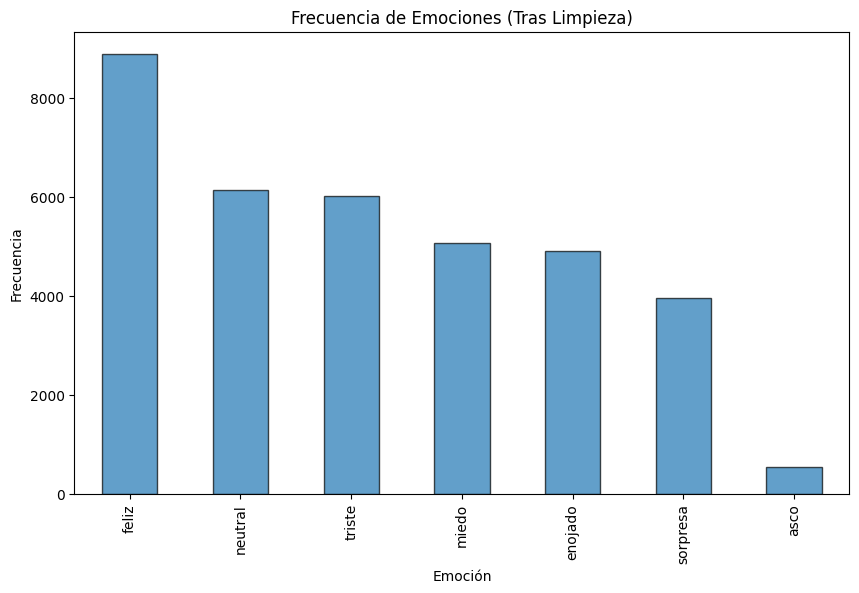

In [ ]:
# Visualización
# Gráfico de barras para emociones (categórico)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_transformado["emocion"].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel("Emoción")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Emociones (Tras Limpieza)")
plt.show()

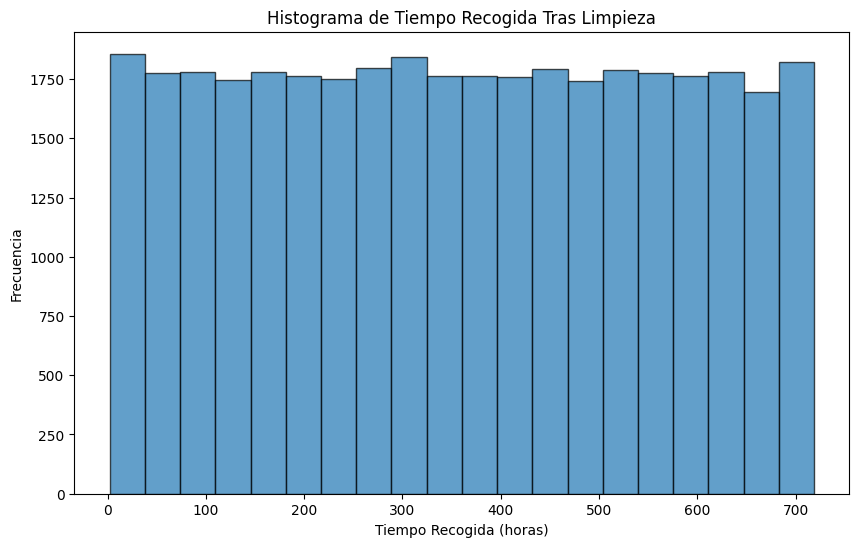

In [ ]:
# Histograma para tiempo_recogida (numérico)
plt.figure(figsize=(10, 6))
plt.hist(df_transformado["tiempo_recogida"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Tiempo Recogida (horas)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Tiempo Recogida Tras Limpieza")
plt.show()

Tras terminar de revisar este histograma se puede entender que no es nada intuitivo para una presentación a usuarios normales, por lo cuál tengo que transformar la vista actual a un formato más amigable para usuarios no técnicos, como fechas y horas legibles (ej. "1 de septiembre de 2022, 07:00"), para mejorar la presentación y el histograma.

---

**Horas faltantes**: {0, 1, 720, ..., 743} (26 horas).  


Voy a convertir tiempo_recogida a un formato de fecha y hora legible usando **datetime** (datetime es un módulo que proporciona herramientas para trabajar con fechas y horas) de Python, sumando las horas al punto de referencia (07:00 del 1 de septiembre de 2022).

Esto facilitará:  

Explicar las horas faltantes (ej. "31 de septiembre, 07:00 a 06:59 del 1 de octubre").  

Y hacer un histograma con etiquetas de fechas/horas comprensibles.





In [ ]:
from datetime import datetime, timedelta
#import datetime, timedelta: Importa específicamente dos clases (o tipos de objetos) del módulo datetime:
#datetime: Una clase para representar una fecha y hora específica (ej. "2022-09-01 07:00:00").
#timedelta: Una clase para representar una diferencia de tiempo (ej. 291 horas).
#Esto nos permite usar datetime y timedelta directamente en el código sin escribir datetime.datetime o datetime.timedelta

**Datetime**:  
Representa un punto específico en el tiempo.  

En el proyecto, definimos una fecha base:  


fecha_base = datetime(2022, 9, 1, 7, 0)  # 07:00 del 1 de septiembre de 2022

**Argumentos**:

2022: Año.  

9: Mes (septiembre).  

1: Día.  

7: Hora (en formato 24h).  

0: Minutos.

**Resultado**: Un objeto datetime que marca el inicio del conteo de tiempo_recogida (hora 0).

---

**timedelta**:  
Representa una duración o intervalo de tiempo (días, horas, minutos, etc.).  

En el proyecto, usamos timedelta para sumar horas a la fecha_base:  

**Ejemplo**:  

Si tiempo_recogida = 291:  
timedelta(hours=291) crea un intervalo de 291 horas.  

fecha_base + timedelta(hours=291) = "2022-09-13 10:00:00" (291 horas después de las 07:00 del 1 de septiembre).

Esto convierte cada valor numérico en una fecha/hora legible.

timedelta maneja automáticamente el paso de horas a días, meses, etc., respetando el calendario (ej. sumar 720 horas a "1 Sep 07:00" da "31 Sep 07:00").




In [ ]:
# Convertir a formato legible
fecha_base = datetime(2022, 9, 1, 7, 0)
df_transformado['fecha_hora'] = df_transformado['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))

# Horas faltantes en formato legible
horas_faltantes = set(range(744)) - set(df_transformado["tiempo_recogida"])
fechas_faltantes = [fecha_base + timedelta(hours=h) for h in horas_faltantes]
print("Horas faltantes en formato legible:")
for fecha in sorted(fechas_faltantes):
    print(fecha)

Horas faltantes en formato legible:
2022-09-01 07:00:00
2022-09-01 08:00:00
2022-10-01 07:00:00
2022-10-01 08:00:00
2022-10-01 09:00:00
2022-10-01 10:00:00
2022-10-01 11:00:00
2022-10-01 12:00:00
2022-10-01 13:00:00
2022-10-01 14:00:00
2022-10-01 15:00:00
2022-10-01 16:00:00
2022-10-01 17:00:00
2022-10-01 18:00:00
2022-10-01 19:00:00
2022-10-01 20:00:00
2022-10-01 21:00:00
2022-10-01 22:00:00
2022-10-01 23:00:00
2022-10-02 00:00:00
2022-10-02 01:00:00
2022-10-02 02:00:00
2022-10-02 03:00:00
2022-10-02 04:00:00
2022-10-02 05:00:00
2022-10-02 06:00:00


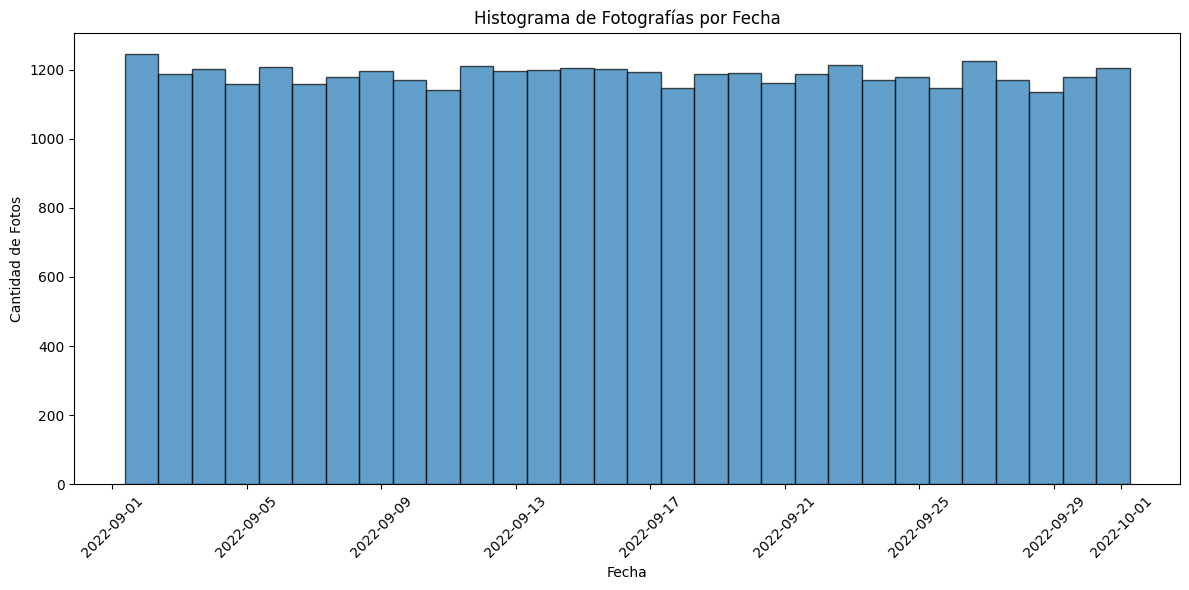

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df_transformado["fecha_hora"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Fotos")
plt.title("Histograma de Fotografías por Fecha")
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.tight_layout()  # Ajustar diseño
plt.show()

In [ ]:
# Guardar en CSV
df_transformado.to_csv("emocion_limpio.csv", index=False)
print("Datos guardados en 'emocion_limpio.csv'")

Datos guardados en 'emocion_limpio.csv'
